In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import random as rd
!simlord --no-sam -rr tt.fa -n 7700 -mr 1500 tt
!./vectorize ./tt.fastq 4 8 100 > ./tt.txt
vi = np.loadtxt("tt.txt")

print(vi.shape)
X = vi
m=X.shape[0] 
n=X.shape[1] 
K=25 
n_iter=100
Centroids=np.array([]).reshape(n,0) 
for i in range(K): 
    rand=rd.randint(0,m-1) 
    Centroids=np.c_[Centroids,X[rand]] 
Centroids 


Time for reading/generating the reference: 0:00:00.110435 h
Time for simulation of 7700 reads: 0:00:44.998989 h.
(7700, 136)


array([[0.00206612, 0.00518824, 0.00561538, ..., 0.0093565 , 0.0146964 ,
        0.00085616],
       [0.00918274, 0.0105095 , 0.0106154 , ..., 0.00840176, 0.00613695,
        0.0162671 ],
       [0.00550964, 0.00452308, 0.00769231, ..., 0.00305518, 0.00419897,
        0.00399543],
       ...,
       [0.00573921, 0.00784888, 0.00715385, ..., 0.0097384 , 0.0108204 ,
        0.00299658],
       [0.00413223, 0.00558734, 0.00738462, ..., 0.00248234, 0.00839793,
        0.00385274],
       [0.00642792, 0.0115738 , 0.00784615, ..., 0.00381898, 0.00532946,
        0.0148402 ]])

In [37]:
Output={}

EuclidianDistance=np.array([]).reshape(m,0)

Centroids[:,0]

tempDist = np.sum((X-Centroids[:,0])**2,axis=1)
tempDist 

array([0.00576406, 0.00613335, 0.00527058, ..., 0.00191849, 0.00253604,
       0.00148986])

In [38]:
for k in range(K): 
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
EuclidianDistance.shape

(7700, 25)

In [39]:

np.argmin(EuclidianDistance,axis=1)

array([15, 18, 18, ...,  1,  2, 23])

In [40]:
# 0부터 시작하므로 보기 편하기 위해 1을 더해서 만들어줌 ( 성능에 의미는 없음 편하게 그냥 만들어봄 )
C=np.argmin(EuclidianDistance,axis=1)+1 
C

array([16, 19, 19, ...,  2,  3, 24])

In [41]:
Y={}
for k in range(K): 
    Y[k+1]=np.array([]).reshape(136,0) # 특징 개수
Y

{1: array([], shape=(136, 0), dtype=float64),
 2: array([], shape=(136, 0), dtype=float64),
 3: array([], shape=(136, 0), dtype=float64),
 4: array([], shape=(136, 0), dtype=float64),
 5: array([], shape=(136, 0), dtype=float64),
 6: array([], shape=(136, 0), dtype=float64),
 7: array([], shape=(136, 0), dtype=float64),
 8: array([], shape=(136, 0), dtype=float64),
 9: array([], shape=(136, 0), dtype=float64),
 10: array([], shape=(136, 0), dtype=float64),
 11: array([], shape=(136, 0), dtype=float64),
 12: array([], shape=(136, 0), dtype=float64),
 13: array([], shape=(136, 0), dtype=float64),
 14: array([], shape=(136, 0), dtype=float64),
 15: array([], shape=(136, 0), dtype=float64),
 16: array([], shape=(136, 0), dtype=float64),
 17: array([], shape=(136, 0), dtype=float64),
 18: array([], shape=(136, 0), dtype=float64),
 19: array([], shape=(136, 0), dtype=float64),
 20: array([], shape=(136, 0), dtype=float64),
 21: array([], shape=(136, 0), dtype=float64),
 22: array([], shape=(

In [42]:

Y[C[0]]=np.c_[Y[C[0]],X[0]]
Y[C[0]]

array([[0.0304163 ],
       [0.0051553 ],
       [0.00438201],
       [0.0136616 ],
       [0.0141771 ],
       [0.00979508],
       [0.00412424],
       [0.0171414 ],
       [0.00154659],
       [0.00554195],
       [0.0162392 ],
       [0.00476866],
       [0.0119861 ],
       [0.00347983],
       [0.00786184],
       [0.00799072],
       [0.00773296],
       [0.00206212],
       [0.00605748],
       [0.00618636],
       [0.0105684 ],
       [0.00541307],
       [0.0103106 ],
       [0.0103106 ],
       [0.00605748],
       [0.0105684 ],
       [0.00799072],
       [0.0123727 ],
       [0.0051553 ],
       [0.00631525],
       [0.0100528 ],
       [0.00979508],
       [0.010955  ],
       [0.00605748],
       [0.0106973 ],
       [0.00657301],
       [0.00412424],
       [0.00605748],
       [0.00631525],
       [0.00734631],
       [0.00451089],
       [0.00966619],
       [0.00463977],
       [0.00554195],
       [0.0081196 ],
       [0.00090218],
       [0.00567083],
       [0.005

In [43]:
# 모든 데이터에 대해 반복
for i in range(m): 
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
Y


{1: array([[0.00191769, 0.00315706, 0.00222603, ..., 0.00265191, 0.00192215,
         0.00213163],
        [0.00855583, 0.00868193, 0.0101027 , ..., 0.00818633, 0.00704789,
         0.0106581 ],
        [0.00457295, 0.00584057, 0.00530822, ..., 0.00449671, 0.00480538,
         0.00253131],
        ...,
        [0.00811329, 0.00615627, 0.00702055, ..., 0.00772512, 0.00864969,
         0.00799361],
        [0.0041304 , 0.00568272, 0.00462329, ..., 0.00438141, 0.00400449,
         0.00439648],
        [0.00811329, 0.00694554, 0.00684932, ..., 0.00760982, 0.00897005,
         0.00786038]]),
 2: array([[0.00217967, 0.00243027, 0.00314882, ..., 0.00181196, 0.00405227,
         0.00414479],
        [0.0112097 , 0.010184  , 0.00911501, ..., 0.00845581, 0.0104346 ,
         0.0132633 ],
        [0.00591624, 0.00439764, 0.00198873, ..., 0.00442923, 0.00233006,
         0.0020724 ],
        ...,
        [0.00685038, 0.00682791, 0.00994365, ..., 0.00845581, 0.00790193,
         0.00400663],
      

In [44]:
for i in range(n_iter): # n_iter 반복 횟수
   
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1) 
        EuclidianDistance=np.c_[EuclidianDistance,tempDist] 
    C=np.argmin(EuclidianDistance,axis=1)+1 
    # K 클러스터 갱신
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(136,0) # Y 딕셔너리 키, 값 할당
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]] # Y 딕셔너리 키(K클러스터), 값(vi, ho) 할당
    for k in range(K):
        Y[k+1]=Y[k+1].T # 전치행렬
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0) # K 클러스터 중심 갱신
    Output=Y
    


In [45]:
print(Output[2].shape)
cnt=0

for k in range(1,K): 
    print("Clustering",k,"개수 ",len(Output[k]))
    for i in range(len(Output[k])): 
        
        for a in range(m):

            if np.array_equal(vi[a],Output[k][i]) == True:

                print("vi[",k,"] == Output[",k ,"][", i,"]")
                cnt+=1
print(cnt)

(571, 136)
Clustering 1 개수  381
vi[ 1 ] == Output[ 1 ][ 0 ]
vi[ 1 ] == Output[ 1 ][ 1 ]
vi[ 1 ] == Output[ 1 ][ 2 ]
vi[ 1 ] == Output[ 1 ][ 3 ]
vi[ 1 ] == Output[ 1 ][ 4 ]
vi[ 1 ] == Output[ 1 ][ 5 ]
vi[ 1 ] == Output[ 1 ][ 6 ]
vi[ 1 ] == Output[ 1 ][ 7 ]
vi[ 1 ] == Output[ 1 ][ 8 ]
vi[ 1 ] == Output[ 1 ][ 9 ]
vi[ 1 ] == Output[ 1 ][ 10 ]
vi[ 1 ] == Output[ 1 ][ 11 ]
vi[ 1 ] == Output[ 1 ][ 12 ]
vi[ 1 ] == Output[ 1 ][ 13 ]
vi[ 1 ] == Output[ 1 ][ 14 ]
vi[ 1 ] == Output[ 1 ][ 15 ]
vi[ 1 ] == Output[ 1 ][ 16 ]
vi[ 1 ] == Output[ 1 ][ 17 ]
vi[ 1 ] == Output[ 1 ][ 18 ]
vi[ 1 ] == Output[ 1 ][ 19 ]
vi[ 1 ] == Output[ 1 ][ 20 ]
vi[ 1 ] == Output[ 1 ][ 21 ]
vi[ 1 ] == Output[ 1 ][ 22 ]
vi[ 1 ] == Output[ 1 ][ 23 ]
vi[ 1 ] == Output[ 1 ][ 24 ]
vi[ 1 ] == Output[ 1 ][ 25 ]
vi[ 1 ] == Output[ 1 ][ 26 ]
vi[ 1 ] == Output[ 1 ][ 27 ]
vi[ 1 ] == Output[ 1 ][ 28 ]
vi[ 1 ] == Output[ 1 ][ 29 ]
vi[ 1 ] == Output[ 1 ][ 30 ]
vi[ 1 ] == Output[ 1 ][ 31 ]
vi[ 1 ] == Output[ 1 ][ 32 ]
vi[ 1 ] == Output[ 1 

vi[ 1 ] == Output[ 1 ][ 277 ]
vi[ 1 ] == Output[ 1 ][ 278 ]
vi[ 1 ] == Output[ 1 ][ 279 ]
vi[ 1 ] == Output[ 1 ][ 280 ]
vi[ 1 ] == Output[ 1 ][ 281 ]
vi[ 1 ] == Output[ 1 ][ 282 ]
vi[ 1 ] == Output[ 1 ][ 283 ]
vi[ 1 ] == Output[ 1 ][ 284 ]
vi[ 1 ] == Output[ 1 ][ 285 ]
vi[ 1 ] == Output[ 1 ][ 286 ]
vi[ 1 ] == Output[ 1 ][ 287 ]
vi[ 1 ] == Output[ 1 ][ 288 ]
vi[ 1 ] == Output[ 1 ][ 289 ]
vi[ 1 ] == Output[ 1 ][ 290 ]
vi[ 1 ] == Output[ 1 ][ 291 ]
vi[ 1 ] == Output[ 1 ][ 292 ]
vi[ 1 ] == Output[ 1 ][ 293 ]
vi[ 1 ] == Output[ 1 ][ 294 ]
vi[ 1 ] == Output[ 1 ][ 295 ]
vi[ 1 ] == Output[ 1 ][ 296 ]
vi[ 1 ] == Output[ 1 ][ 297 ]
vi[ 1 ] == Output[ 1 ][ 298 ]
vi[ 1 ] == Output[ 1 ][ 299 ]
vi[ 1 ] == Output[ 1 ][ 300 ]
vi[ 1 ] == Output[ 1 ][ 301 ]
vi[ 1 ] == Output[ 1 ][ 302 ]
vi[ 1 ] == Output[ 1 ][ 303 ]
vi[ 1 ] == Output[ 1 ][ 304 ]
vi[ 1 ] == Output[ 1 ][ 305 ]
vi[ 1 ] == Output[ 1 ][ 306 ]
vi[ 1 ] == Output[ 1 ][ 307 ]
vi[ 1 ] == Output[ 1 ][ 308 ]
vi[ 1 ] == Output[ 1 ][ 309 ]
vi[ 1 ] ==

vi[ 2 ] == Output[ 2 ][ 176 ]
vi[ 2 ] == Output[ 2 ][ 177 ]
vi[ 2 ] == Output[ 2 ][ 178 ]
vi[ 2 ] == Output[ 2 ][ 179 ]
vi[ 2 ] == Output[ 2 ][ 180 ]
vi[ 2 ] == Output[ 2 ][ 181 ]
vi[ 2 ] == Output[ 2 ][ 182 ]
vi[ 2 ] == Output[ 2 ][ 183 ]
vi[ 2 ] == Output[ 2 ][ 184 ]
vi[ 2 ] == Output[ 2 ][ 185 ]
vi[ 2 ] == Output[ 2 ][ 186 ]
vi[ 2 ] == Output[ 2 ][ 187 ]
vi[ 2 ] == Output[ 2 ][ 188 ]
vi[ 2 ] == Output[ 2 ][ 189 ]
vi[ 2 ] == Output[ 2 ][ 190 ]
vi[ 2 ] == Output[ 2 ][ 191 ]
vi[ 2 ] == Output[ 2 ][ 192 ]
vi[ 2 ] == Output[ 2 ][ 193 ]
vi[ 2 ] == Output[ 2 ][ 194 ]
vi[ 2 ] == Output[ 2 ][ 195 ]
vi[ 2 ] == Output[ 2 ][ 196 ]
vi[ 2 ] == Output[ 2 ][ 197 ]
vi[ 2 ] == Output[ 2 ][ 198 ]
vi[ 2 ] == Output[ 2 ][ 199 ]
vi[ 2 ] == Output[ 2 ][ 200 ]
vi[ 2 ] == Output[ 2 ][ 201 ]
vi[ 2 ] == Output[ 2 ][ 202 ]
vi[ 2 ] == Output[ 2 ][ 203 ]
vi[ 2 ] == Output[ 2 ][ 204 ]
vi[ 2 ] == Output[ 2 ][ 205 ]
vi[ 2 ] == Output[ 2 ][ 206 ]
vi[ 2 ] == Output[ 2 ][ 207 ]
vi[ 2 ] == Output[ 2 ][ 208 ]
vi[ 2 ] ==

KeyboardInterrupt: 

IndexError: list index out of range

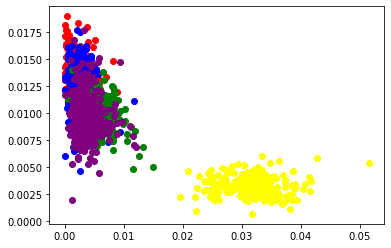

In [46]:
color=['red','blue','green','purple','yellow']
labels=['virusA','virusB','virusC','virusD','virusE']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
#plt.scatter(Centroids[0,:],Centroids[1,:],s=100,c='yellow',label='Centroids')

plt.legend()
plt.show()


In [47]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(vi,np.argmin(EuclidianDistance,axis=1))

0.19139820104875452

In [48]:
from Bio import SeqIO

records = list(SeqIO.parse("tt.fa", "fasta"))
print(records[0].description)  # first record
print(records[-1].id)  # last record

scaffold-0
scaffold-7706


In [49]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.0175,min_samples=5)
clusters = model.fit_predict(vi)

df = pd.DataFrame(clusters,columns=["cluster"]).reset_index()

df.colums = ["cluster"]

print(df.head)
print(df.groupby(["cluster"]).count())

for k in range(100):
    if df["cluster"][k] == 0:
        plt.scatter(vi[k][0],vi[k][1],color='green')
    if df["cluster"][k] == 1:
        plt.scatter(vi[k][0],vi[k][1],color='blue')
    if df["cluster"][k] == 2:
        plt.scatter(vi[k][0],vi[k][1],color='black')
    if df["cluster"][k] == 3:
        plt.scatter(vi[k][0],vi[k][1],color='orange')

plt.show()


KeyboardInterrupt: 

(5952, 2)


/Users/suhyeonglee/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/suhyeonglee/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

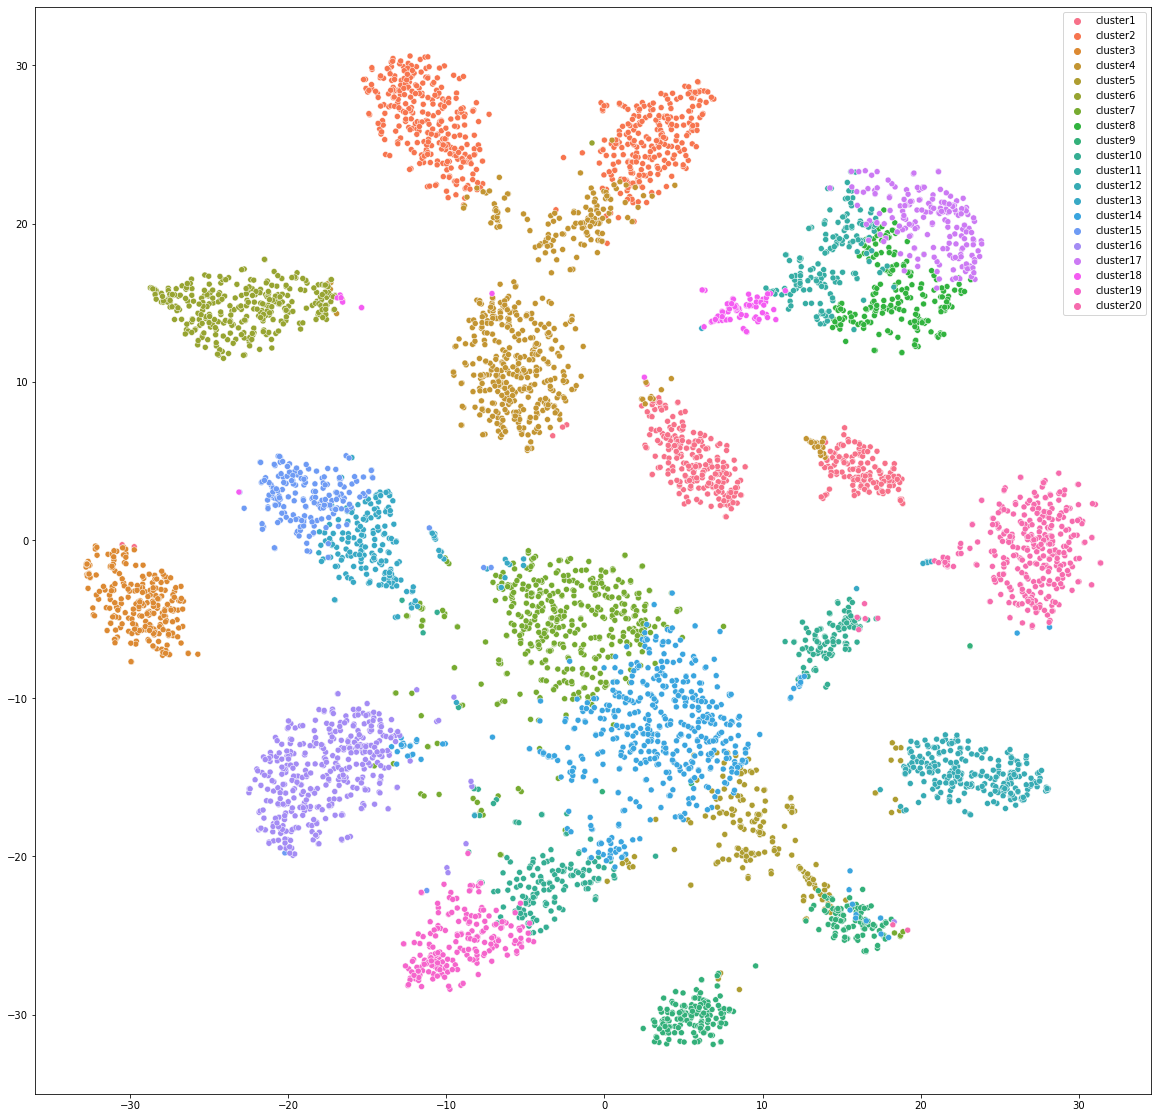

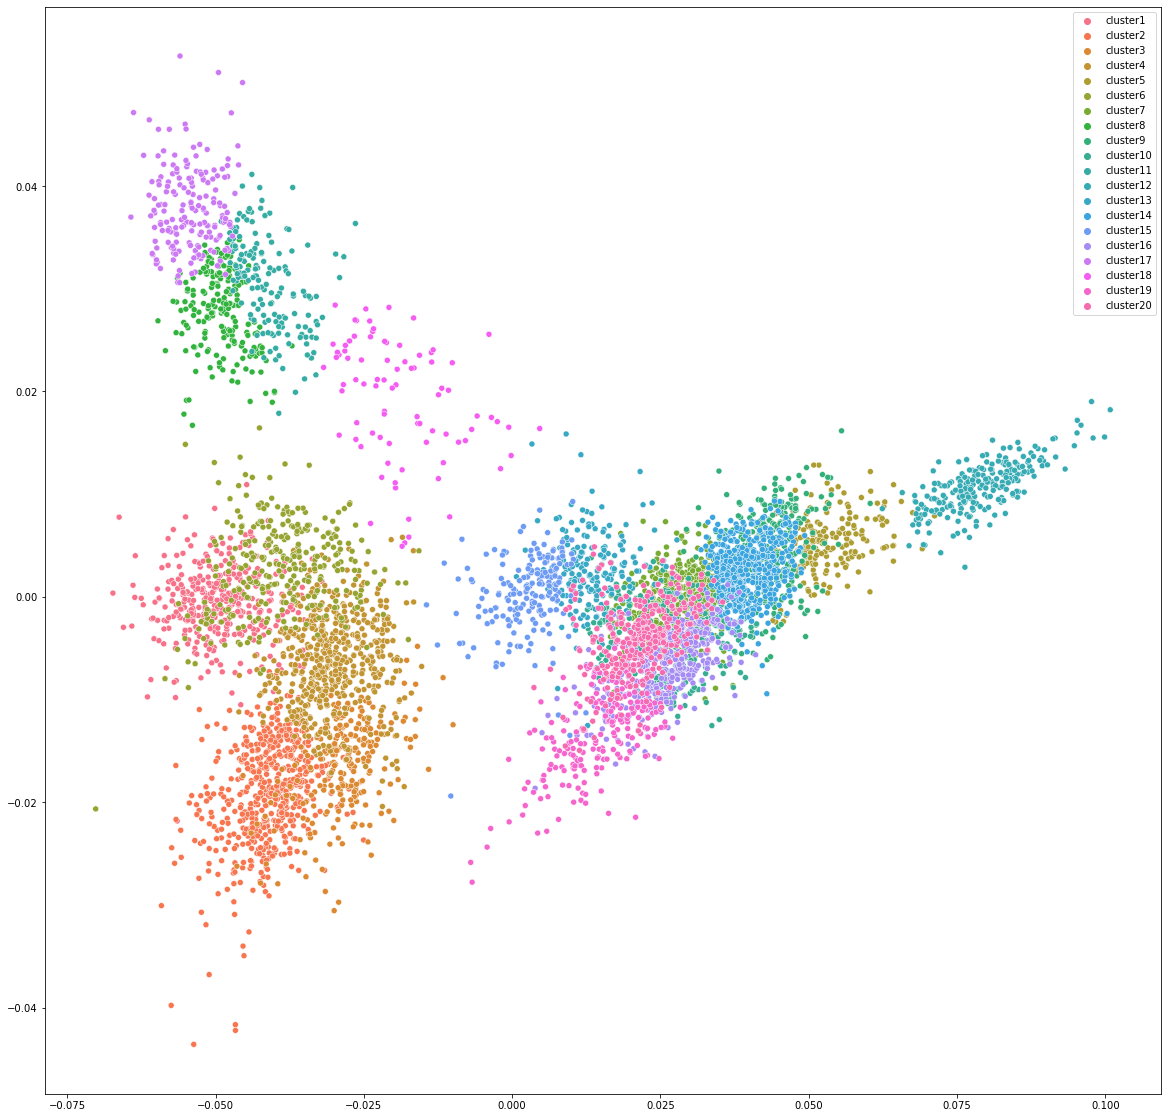

In [56]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
data = np.append(Output[1],Output[2],axis=0)
data2 = np.append(data,Output[3],axis=0)
data3 = np.append(data2,Output[4],axis=0)
data4 = np.append(data3,Output[5],axis=0)
data5 = np.append(data4,Output[6],axis=0)
data6 = np.append(data5,Output[7],axis=0)
data7 = np.append(data6,Output[8],axis=0)
data8 = np.append(data7,Output[9],axis=0)
data9 = np.append(data8,Output[10],axis=0)
data10 = np.append(data9,Output[11],axis=0)
data11 = np.append(data10,Output[12],axis=0)
data12 = np.append(data11,Output[13],axis=0)
data13 = np.append(data12,Output[14],axis=0)
data14 = np.append(data13,Output[15],axis=0)
data15 = np.append(data14,Output[16],axis=0)
data16 = np.append(data15,Output[17],axis=0)
data17 = np.append(data16,Output[18],axis=0)
data18 = np.append(data17,Output[19],axis=0)
data19 = np.append(data18,Output[20],axis=0)


labels  = ["cluster1" for x in range(len(Output[1]))]
labels  += ["cluster2" for x in range(len(Output[2]))]
labels  += ["cluster3" for x in range(len(Output[3]))]
labels  += ["cluster4" for x in range(len(Output[4]))]
labels  += ["cluster5" for x in range(len(Output[5]))]
labels  += ["cluster6" for x in range(len(Output[6]))]
labels  += ["cluster7" for x in range(len(Output[7]))]
labels  += ["cluster8" for x in range(len(Output[8]))]
labels  += ["cluster9" for x in range(len(Output[9]))]
labels  += ["cluster10" for x in range(len(Output[10]))]
labels  += ["cluster11" for x in range(len(Output[11]))]
labels  += ["cluster12" for x in range(len(Output[12]))]
labels  += ["cluster13" for x in range(len(Output[13]))]
labels  += ["cluster14" for x in range(len(Output[14]))]
labels  += ["cluster15" for x in range(len(Output[15]))]
labels  += ["cluster16" for x in range(len(Output[16]))]
labels  += ["cluster17" for x in range(len(Output[17]))]
labels  += ["cluster18" for x in range(len(Output[18]))]
labels  += ["cluster19" for x in range(len(Output[19]))]
labels  += ["cluster20" for x in range(len(Output[20]))]

labels = np.array(labels)


tsne = TSNE(learning_rate=10)
data_2d = tsne.fit_transform(data19)
print(data_2d.shape)
fig = plt.figure(figsize=(20, 20))
sns.scatterplot(data_2d[:,0], data_2d[:,1], hue=labels)

pca = PCA()
data_2d = pca.fit_transform(data19)
fig = plt.figure(figsize=(20, 20))
sns.scatterplot(data_2d[:,0], data_2d[:,1], hue=labels)